In [1]:
from mybot2 import MissileCoach
from tqdm.notebook import tqdm

In [2]:
mc = MissileCoach.create_new(128,256,128,64, 0.95, 256, 2048, 0.000005, 0.0005,45)

loading dataset
Loading D:\neuro_missile\src\saves\standart.bin...
Loading D:\neuro_missile\src\saves\success_1.bin...
Loading D:\neuro_missile\src\saves\sc_simple_2.bin...
Loading D:\neuro_missile\src\saves\Cy-57_1.bin...
Loading D:\neuro_missile\src\saves\RaptorF_2.bin...
Loading D:\neuro_missile\src\saves\sc_simple_3.bin...
Loading D:\neuro_missile\src\saves\success_2.bin...
Loading D:\neuro_missile\src\saves\success_5.bin...
Loading D:\neuro_missile\src\saves\Chengdu_1.bin...
Loading D:\neuro_missile\src\saves\Chengdu_2.bin...
Loading D:\neuro_missile\src\saves\Refale_1.bin...
Loading D:\neuro_missile\src\saves\success_3.bin...
Loading D:\neuro_missile\src\saves\fail_2.bin...
Loading D:\neuro_missile\src\saves\fail_3.bin...
Loading D:\neuro_missile\src\saves\sc_simple_1.bin...
Loading D:\neuro_missile\src\saves\fail_1.bin...
Loading D:\neuro_missile\src\saves\success_4.bin...
Loading D:\neuro_missile\src\saves\RaptorF_1.bin...
Dataset loaded!


In [3]:
for i in tqdm(range(4000)):
    mc.make_epoch(False)

KeyboardInterrupt: 

In [9]:
mc.make_epoch()

100%|████████████████████████████████████████████████████████████████████████████████| 994/994 [00:28<00:00, 34.34it/s]


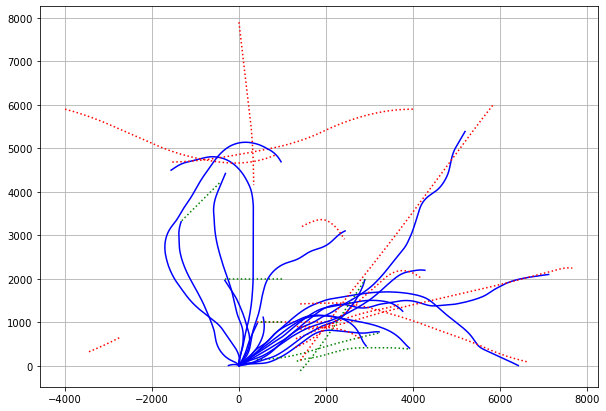

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from missile_gym import MissileGym

fig, ax = plt.subplots(figsize=(10,7))
for sc_name, d in tqdm(mc.get_dataset().trees.items()):
    node = d['tree'].root
    is_hit, ts, alphas, xsm, ysm, xst, yst = mc.make_traect(node)
    ax.plot(xsm, ysm, color='blue', label=f'{sc_name} {is_hit}')
    ax.plot(xst, yst, ':', color='green' if is_hit else 'r', label=sc_name)

ax.grid()
# ax.legend()
ax.axis('equal')
plt.show()

In [19]:
mc.get_dataset().save()

In [17]:
import torch as T

In [18]:
T.save(mc.to_dict(), 'models/128_256_128_64_0.95_256_2048_0.000005_0.0005_45.mc')

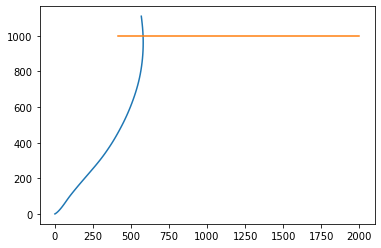

In [6]:
plt.plot(xsm, ysm)
plt.plot(xst, yst)
plt.show()

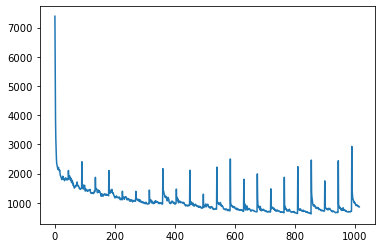

In [8]:
plt.plot([h['error'] for h in mc.history])